<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/01_pytorch_workflow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

See: https://www.learnpytorch.io/01_pytorch_workflow/

# 01. PyTorch Workflow Exercise Template

The following is a template for the PyTorch workflow exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [1]:
# Import necessary libraries
# Import PyTorch and matplotlib
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.3.0+cpu'

In [2]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total. 
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [3]:
# 1) Create the data parameters

# Create weight and bias
weight = 0.3
bias = 0.9

# Create range values
start = 0
end = 1
datapoints = 100
step = (end - start)/datapoints

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight*X + bias 

# Make X and y using linear regression feature


print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


In [4]:
# 2) Split the data into training and testing
train_split = int( datapoints * 0.8 )

x_train, y_train = X[:train_split], y[:train_split]

x_test, y_test = X[train_split:], y[train_split:]

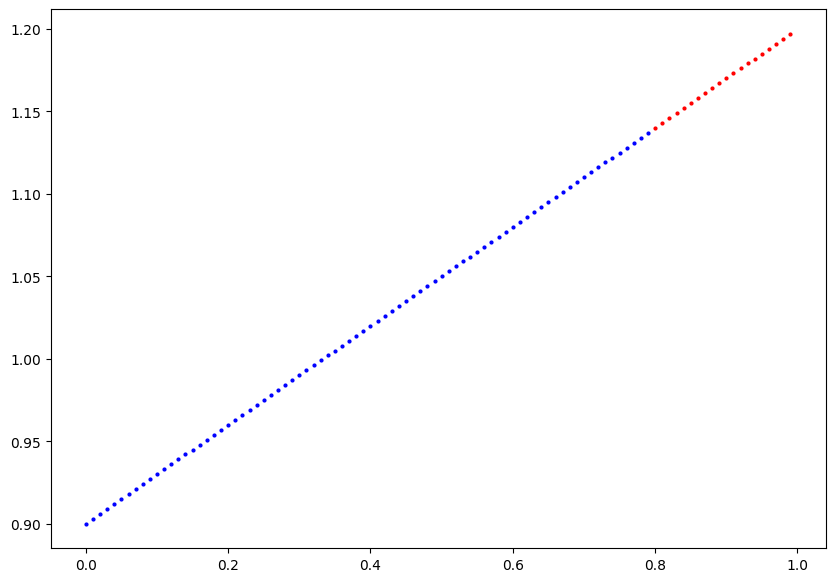

In [5]:
# Plot the training and testing data 
plt.figure(figsize=(10, 7))
plt.scatter(x_train, y_train, c="b", s=4, label="Testing data")
plt.scatter(x_test, y_test, c="r", s=4, label="Testing data")

## 2. Build a PyTorch model by subclassing `nn.Module`. 
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`. 
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1. 
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [6]:
# Create PyTorch linear regression model by subclassing nn.Module

class LinearRegressionModel(nn.Module): 
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True) 
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True) 

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: 
        return self.weights * x + self.bias 

In [7]:
# Instantiate the model and put it to the target device
model = LinearRegressionModel()
model.to(device)

LinearRegressionModel()

## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively. 
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [8]:
# Create the loss function and optimizer
loss_function = nn.L1Loss()

# Create optimizer
learning_rate = 0.01
optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate)

In [9]:
# Training loop

# Train model for 300 epochs
epochs = 600 

# Send data to target device
x_train = x_train.to(device)
x_test = x_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    
    # Put model in train mode
    model.train() 
    
    # 1. Forward pass
    y_pred = model(x_train)
    
    # 2. Calculate loss
    loss = loss_function(y_pred, y_train)
    
    # 3. Zero gradients
    optimizer.zero_grad()
    
    # 4. Backpropagation
    loss.backward()
    
    # 5. Step the optimizer
    optimizer.step()

    # Put model in evaluation mode and setup inference context 
    model.eval() 
    
    with torch.inference_mode():
        # 1. Forward pass
        test_pred = model(x_test)
        
        # 2. Calculate test loss
        test_loss = loss_function(test_pred, y_test)

        ### Perform testing every 20 epochs
        if epoch % 20 == 0:
            # Print out what's happening
            print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 1.027 | Test loss: 1.119
Epoch: 20 | Train loss: 0.796 | Test loss: 0.848
Epoch: 40 | Train loss: 0.565 | Test loss: 0.577
Epoch: 60 | Train loss: 0.334 | Test loss: 0.307
Epoch: 80 | Train loss: 0.102 | Test loss: 0.036
Epoch: 100 | Train loss: 0.024 | Test loss: 0.054
Epoch: 120 | Train loss: 0.017 | Test loss: 0.039
Epoch: 140 | Train loss: 0.010 | Test loss: 0.023
Epoch: 160 | Train loss: 0.003 | Test loss: 0.006
Epoch: 180 | Train loss: 0.004 | Test loss: 0.011
Epoch: 200 | Train loss: 0.004 | Test loss: 0.011
Epoch: 220 | Train loss: 0.004 | Test loss: 0.011
Epoch: 240 | Train loss: 0.004 | Test loss: 0.011
Epoch: 260 | Train loss: 0.004 | Test loss: 0.011
Epoch: 280 | Train loss: 0.004 | Test loss: 0.011
Epoch: 300 | Train loss: 0.004 | Test loss: 0.011
Epoch: 320 | Train loss: 0.004 | Test loss: 0.011
Epoch: 340 | Train loss: 0.004 | Test loss: 0.011
Epoch: 360 | Train loss: 0.004 | Test loss: 0.011
Epoch: 380 | Train loss: 0.004 | Test loss: 0.011
Epoch:

## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [10]:
# Make predictions with the model

# place model in evaluate mode
model.eval()

# move to device
x_test = x_test.to(device)

# evaluate
with torch.inference_mode():
  y_predict = model(x_test)

print(y_predict)

tensor([[1.1375],
        [1.1406],
        [1.1436],
        [1.1466],
        [1.1497],
        [1.1527],
        [1.1557],
        [1.1587],
        [1.1618],
        [1.1648],
        [1.1678],
        [1.1709],
        [1.1739],
        [1.1769],
        [1.1800],
        [1.1830],
        [1.1860],
        [1.1891],
        [1.1921],
        [1.1951]])


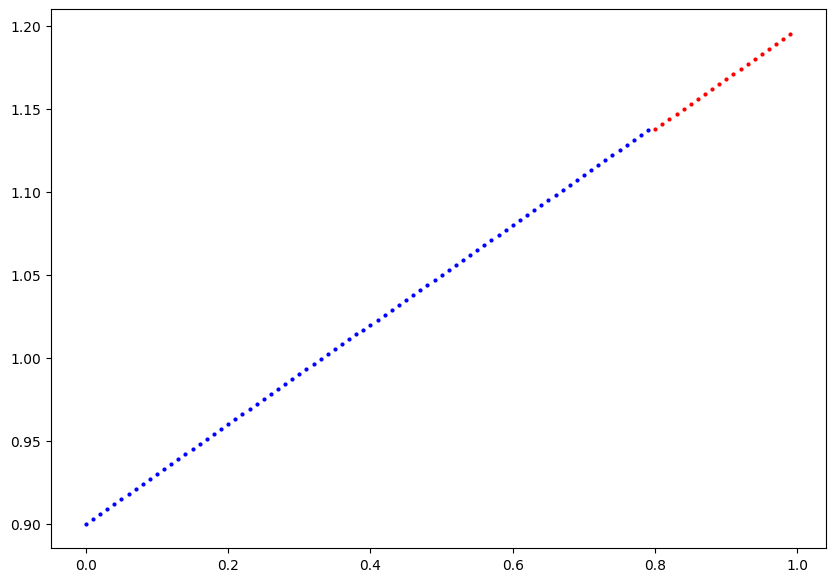

In [11]:
# Plot the predictions (these may need to be on a specific device)
plt.figure(figsize=(10, 7))
plt.scatter(x_train, y_train, c="b", s=4, label="Testing data")
plt.scatter(x_test, y_predict, c="r", s=4, label="Testing data")

## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [12]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "workflow_exercise_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME # note use of division operator, overriden use for Path type

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH) 

Saving model to: models/workflow_exercise_1.pth


In [13]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
loaded_model = LinearRegressionModel()

loaded_model.load_state_dict( torch.load(f=MODEL_SAVE_PATH) )

<All keys matched successfully>

In [14]:
# Make predictions with loaded model and compare them to the previous
loaded_model.eval()

with torch.inference_mode():
    loaded_model_prediction = loaded_model(x_test)

print(loaded_model_prediction)

tensor([[1.1375],
        [1.1406],
        [1.1436],
        [1.1466],
        [1.1497],
        [1.1527],
        [1.1557],
        [1.1587],
        [1.1618],
        [1.1648],
        [1.1678],
        [1.1709],
        [1.1739],
        [1.1769],
        [1.1800],
        [1.1830],
        [1.1860],
        [1.1891],
        [1.1921],
        [1.1951]])
